In [174]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re

df_train = pd.read_csv("congressional_tweet_training_data.csv",names=None)


In [175]:
df_train

,favorite_count,full_text,hashtags,retweet_count,year,party_id
0,0,"b""RT @KUSINews: One of our longtime viewers wa...",KUSI,10,2017.0,R
1,258,"b""Today I'm urging the @CDCgov to immediately ...",Coronavirus,111,2020.0,R
2,0,"b'Tomorrow, #MO03 seniors graduate from Calvar...",MO03,2,2014.0,R
3,9,b'Congrats to #TeamUSA and Canton Native @JGre...,TeamUSA WorldJuniors,3,2017.0,R
4,3,b'Pleased to support @amergateways at their Ju...,ImmigrantHeritageMonth,3,2019.0,D
...,...,...,...,...,...,...
592798,3,"b'This time, it focused on careers in #publics...",publicservice publicsafety,0,2017.0,R
592799,5,"b'.#StormyDaniels, #MichaelWolfe, #JamesComey ...",StormyDaniels MichaelWolfe JamesComey,1,2018.0,R
592800,33,b'@NRDems The American people deserve the trut...,CultureOfCorruption,14,2020.0,D
592801,4,b'Only 2 weeks left to submit your #app to the...,app copolitics CAC16 HouseOfCode co06,3,2016.0,R


In [176]:
df_train=df_train.dropna()
df_train

,favorite_count,full_text,hashtags,retweet_count,year,party_id
0,0,"b""RT @KUSINews: One of our longtime viewers wa...",KUSI,10,2017.0,R
1,258,"b""Today I'm urging the @CDCgov to immediately ...",Coronavirus,111,2020.0,R
2,0,"b'Tomorrow, #MO03 seniors graduate from Calvar...",MO03,2,2014.0,R
3,9,b'Congrats to #TeamUSA and Canton Native @JGre...,TeamUSA WorldJuniors,3,2017.0,R
4,3,b'Pleased to support @amergateways at their Ju...,ImmigrantHeritageMonth,3,2019.0,D
...,...,...,...,...,...,...
592798,3,"b'This time, it focused on careers in #publics...",publicservice publicsafety,0,2017.0,R
592799,5,"b'.#StormyDaniels, #MichaelWolfe, #JamesComey ...",StormyDaniels MichaelWolfe JamesComey,1,2018.0,R
592800,33,b'@NRDems The American people deserve the trut...,CultureOfCorruption,14,2020.0,D
592801,4,b'Only 2 weeks left to submit your #app to the...,app copolitics CAC16 HouseOfCode co06,3,2016.0,R


In [177]:
df_train['year'] = df_train['year'].astype('int32')

C:\Users\gokha\AppData\Local\Temp/ipykernel_18480/2456529453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['year'] = df_train['year'].astype('int32')


In [178]:
plt.rcParams['figure.figsize']=[6,4]

plt.rcParams['figure.dpi']=120

C:\Users\gokha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


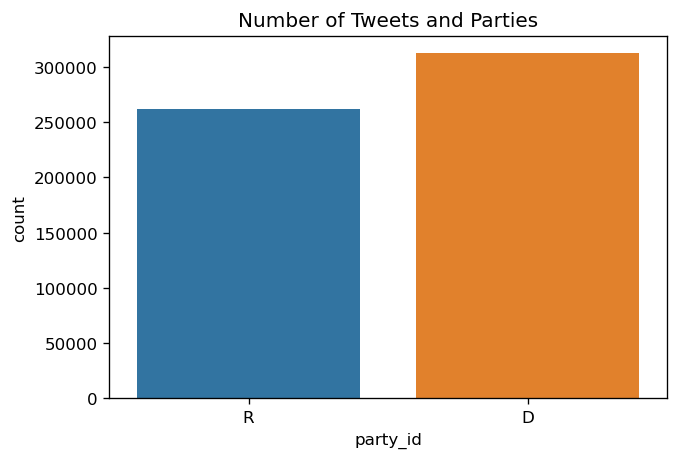

In [201]:
# Descriptive Statistics

plt.title('Number of Tweets and Parties')
sns.countplot('party_id', data=df_train);

In [235]:
df_train['party_id'].value_counts()

D    312116
R    261975
Name: party_id, dtype: int64

<AxesSubplot:ylabel='party_id'>

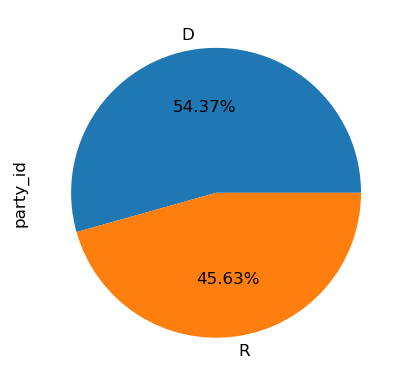

In [237]:
df_train['party_id'].value_counts().plot.pie(autopct='%1.2f%%')

C:\Users\gokha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


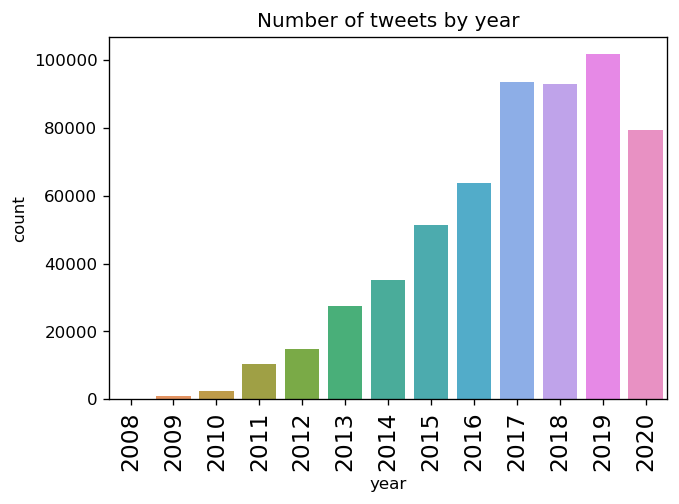

In [238]:
sns.countplot('year', data=df_train)
plt.title('Number of tweets by year')
plt.xticks(fontsize=14, rotation=90);


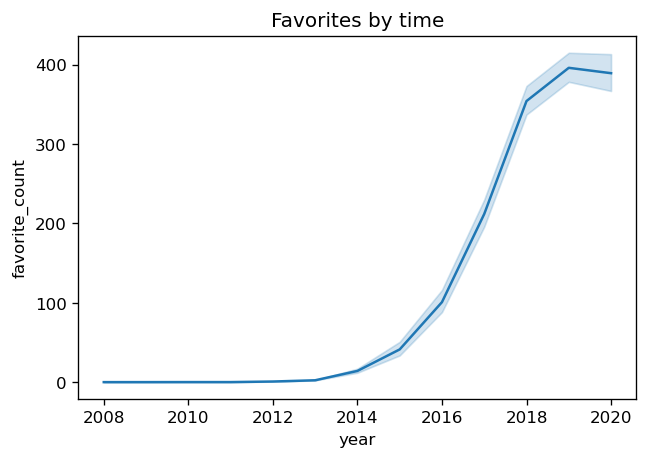

In [239]:
sns.lineplot(x = "year", y = "favorite_count",
             data = df_train).set(title='Favorites by time');

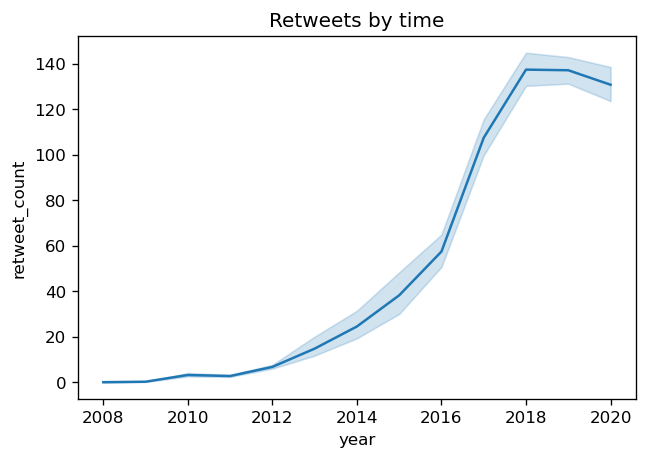

In [240]:
sns.lineplot(x = "year", y = "retweet_count",
             data = df_train).set(title='Retweets by time');

In [241]:
# Length of tweet
words=pd.Series(df_train["full_text"])
words.str.len()
df_train['tweet_length']=words.str.len()

C:\Users\gokha\AppData\Local\Temp/ipykernel_18480/1629261600.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['tweet_length']=words.str.len()


In [242]:

words2=pd.Series(df_train["hashtags"])
words2.str.len()
df_train['hashtag_length']=words2.str.len()

C:\Users\gokha\AppData\Local\Temp/ipykernel_18480/1125676007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['hashtag_length']=words2.str.len()


In [243]:
df_train

,favorite_count,full_text,hashtags,retweet_count,year,party_id,tweet_length,hashtag_length
0,0,"b""RT @KUSINews: One of our longtime viewers wa...",KUSI,10,2017,R,154,4
1,258,"b""Today I'm urging the @CDCgov to immediately ...",Coronavirus,111,2020,R,317,11
2,0,"b'Tomorrow, #MO03 seniors graduate from Calvar...",MO03,2,2014,R,140,4
3,9,b'Congrats to #TeamUSA and Canton Native @JGre...,TeamUSA WorldJuniors,3,2017,R,130,20
4,3,b'Pleased to support @amergateways at their Ju...,ImmigrantHeritageMonth,3,2019,D,316,22
...,...,...,...,...,...,...,...,...
592798,3,"b'This time, it focused on careers in #publics...",publicservice publicsafety,0,2017,R,96,26
592799,5,"b'.#StormyDaniels, #MichaelWolfe, #JamesComey ...",StormyDaniels MichaelWolfe JamesComey,1,2018,R,101,37
592800,33,b'@NRDems The American people deserve the trut...,CultureOfCorruption,14,2020,D,284,19
592801,4,b'Only 2 weeks left to submit your #app to the...,app copolitics CAC16 HouseOfCode co06,3,2016,R,138,37


In [244]:
df_train[['favorite_count','retweet_count','year','tweet_length','hashtag_length']].describe().round(2)

,favorite_count,retweet_count,year,tweet_length,hashtag_length
count,574091.00,574091.00,574091.00,574091.00,574091.00
mean,231.91,94.42,2016.99,182.68,14.49
std,2455.98,980.50,2.34,74.12,10.13
min,0.00,0.00,2008.00,7.00,1.00
25%,2.00,2.00,2016.00,133.00,8.00
50%,9.00,5.00,2017.00,154.00,12.00
75%,35.00,16.00,2019.00,246.00,19.00
max,426481.00,186638.00,2020.00,3763.00,233.00


In [245]:
df_train.describe(include="object")

,full_text,hashtags,party_id
count,574091,574091,574091
unique,569649,185246,2
top,"b""@openletterbot I agree this cruel &amp; inhu...",COVID19,D
freq,58,8812,312116


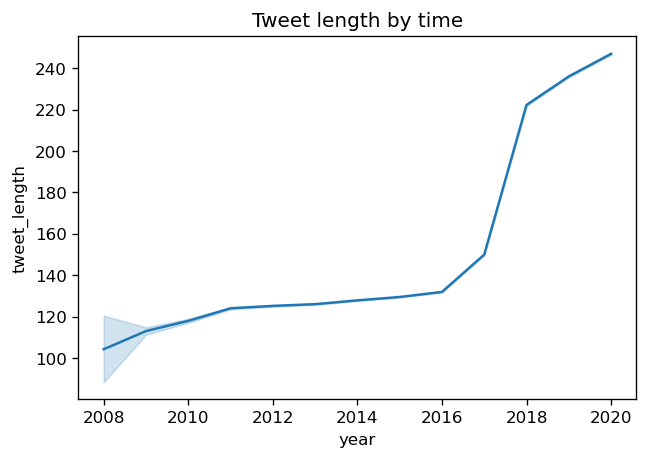

In [246]:
sns.lineplot(x = "year", y = "tweet_length",
             data = df_train).set(title='Tweet length by time');

C:\Users\gokha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


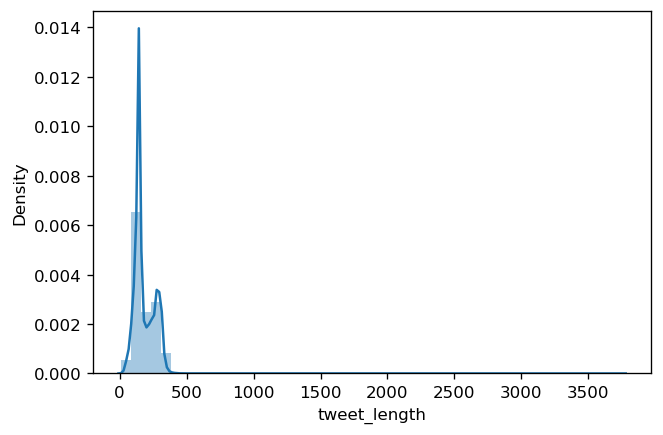

In [254]:
sns.distplot(df_train["tweet_length"]);

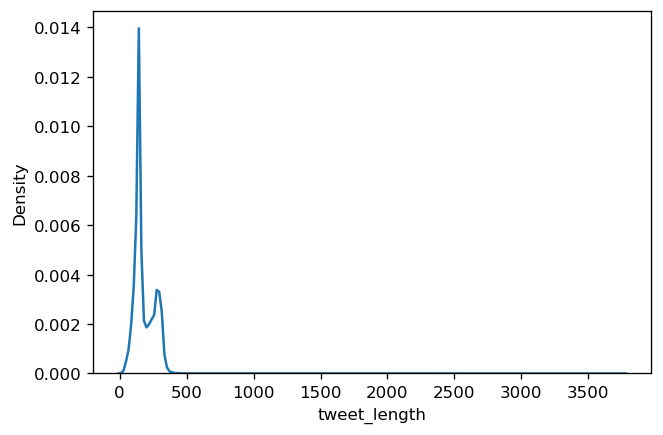

In [258]:
sns.kdeplot(df_train["tweet_length"]);

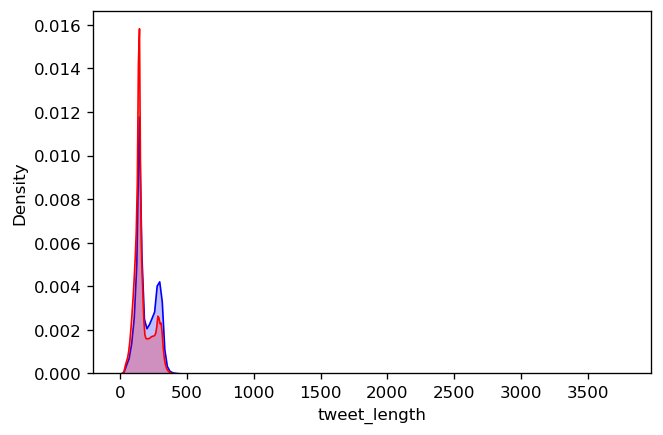

In [271]:
# Tweet length by Democratcs and Republicans

sns.kdeplot(df_train[df_train["party_id"]=="D"]["tweet_length"],shade=True,color='blue')
sns.kdeplot(df_train[df_train["party_id"]=="R"]["tweet_length"],shade=True,color='red');

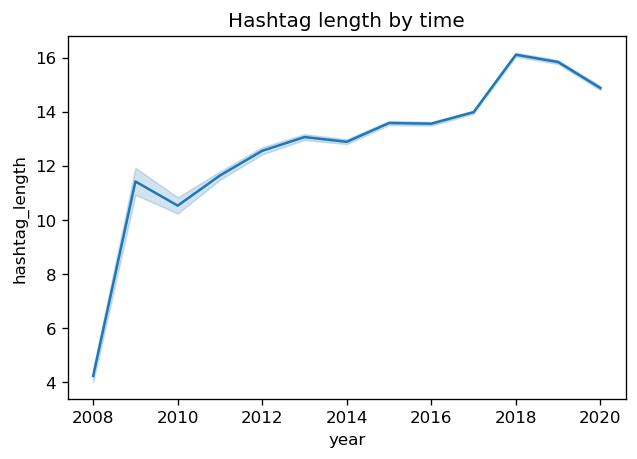

In [247]:
sns.lineplot(x = "year", y = "hashtag_length",
             data = df_train).set(title='Hashtag length by time');

C:\Users\gokha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


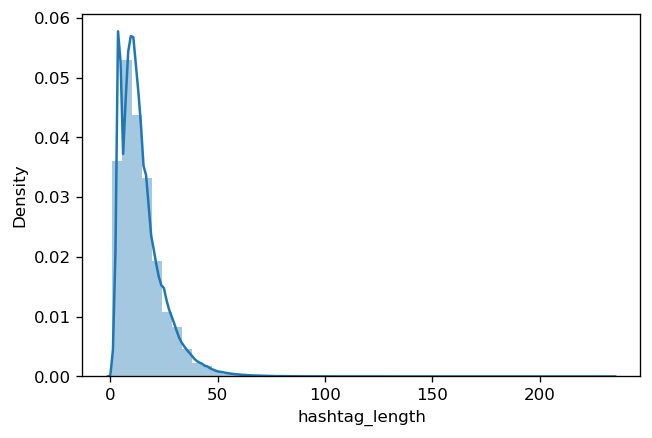

In [255]:
sns.distplot(df_train["hashtag_length"]);

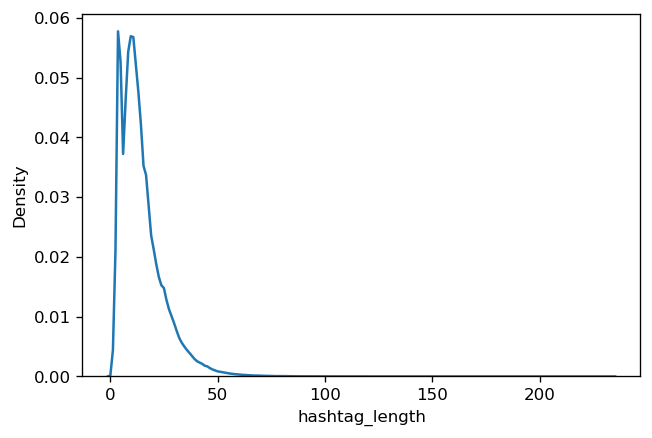

In [257]:
sns.kdeplot(df_train["hashtag_length"]);

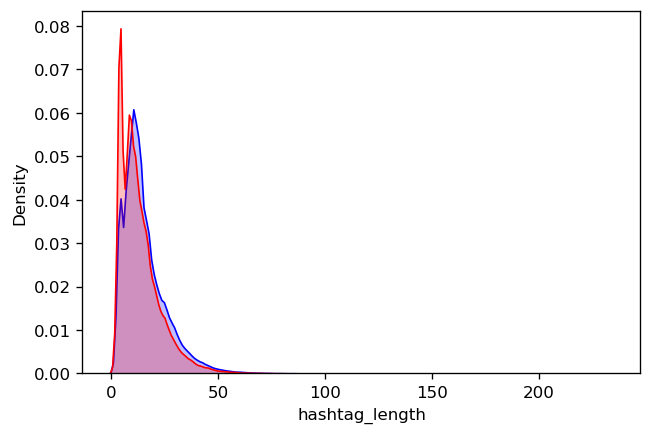

In [272]:
# Tweet length by Democratcs and Republicans

sns.kdeplot(df_train[df_train["party_id"]=="D"]["hashtag_length"],shade=True,color='blue')
sns.kdeplot(df_train[df_train["party_id"]=="R"]["hashtag_length"],shade=True,color='red');


In [260]:
df_train.dtypes

favorite_count     int64
full_text         object
hashtags          object
retweet_count      int64
year               int32
party_id          object
tweet_length       int64
hashtag_length     int64
dtype: object

In [261]:
# Wordcloud
hashtags=df_train['hashtags']
hashtags=str(hashtags)
hashtags

'0                                          KUSI\n1                                   Coronavirus\n2                                          MO03\n3                          TeamUSA WorldJuniors\n4                        ImmigrantHeritageMonth\n                          ...                  \n592798               publicservice publicsafety\n592799    StormyDaniels MichaelWolfe JamesComey\n592800                      CultureOfCorruption\n592801    app copolitics CAC16 HouseOfCode co06\n592802                                MuslimBan\nName: hashtags, Length: 574091, dtype: object'

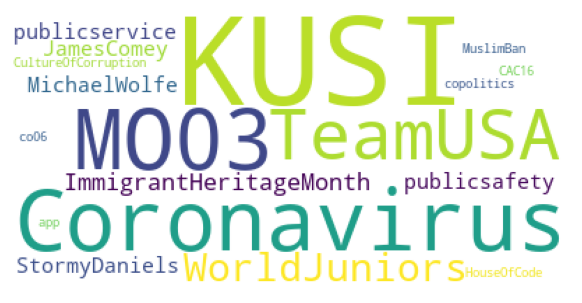

In [278]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords.update(["dtype", "object", "hashtags", "length","Name"])

text = hashtags

wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [279]:
# Hashtag word cloud by Democrats

hashtags_democrat=df_train[df_train["party_id"]=="D"]["hashtags"]
hashtags_democrat=str(hashtags_democrat)
hashtags_democrat




'4              ImmigrantHeritageMonth\n5         sustainability ActOnClimate\n9                        TakeTheCrown\n10                  KavanaughHearings\n13                          FEMA ma09\n                     ...             \n592795                           PA06\n592796                  YuccaMountain\n592797                     NoFirstUse\n592800            CultureOfCorruption\n592802                      MuslimBan\nName: hashtags, Length: 312116, dtype: object'

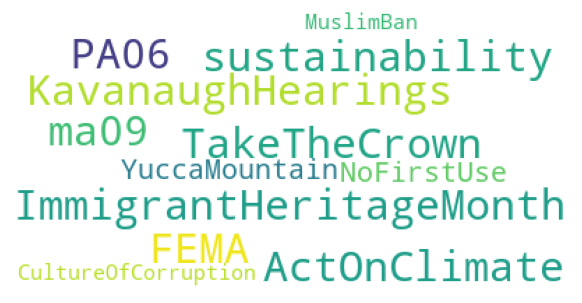

In [280]:
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(hashtags_democrat)
# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [283]:
# Hashtag word cloud by Republicans

hashtags_republican=df_train[df_train["party_id"]=="R"]["hashtags"]
hashtags_republican=str(hashtags_republican)
hashtags_republican


'0                                          KUSI\n1                                   Coronavirus\n2                                          MO03\n3                          TeamUSA WorldJuniors\n6                                           MO7\n                          ...                  \n592788                   NewHampshire Obamacare\n592791                              16floodtour\n592798               publicservice publicsafety\n592799    StormyDaniels MichaelWolfe JamesComey\n592801    app copolitics CAC16 HouseOfCode co06\nName: hashtags, Length: 261975, dtype: object'

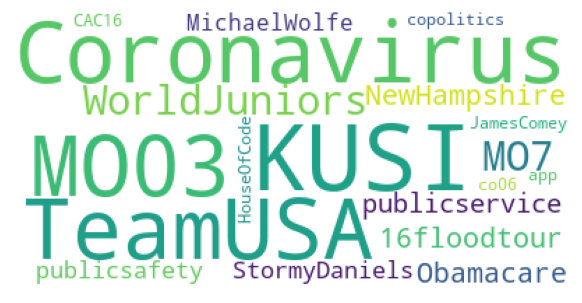

In [284]:
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(hashtags_republican)
# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

C:\Users\gokha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\gokha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


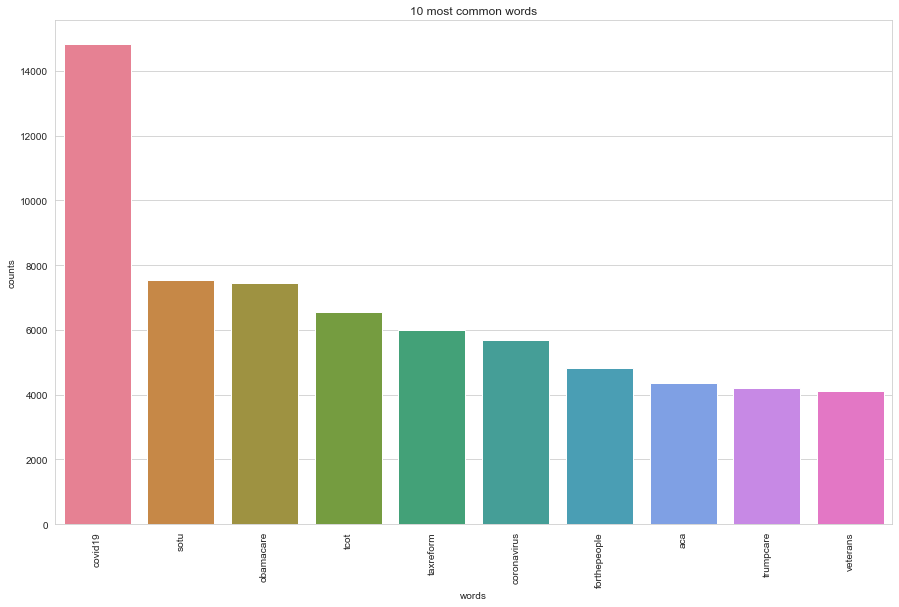

In [287]:
# Latent Dirichlet Allocation (LDA) analysis of hashtags columns
lda_copy = df_train.copy(deep=True)
lda_copy.head()
# Removing punctiation and lower-casing text field without changing original dataframe.
import re


lda_copy=df_train["hashtags"]
lda_copy = lda_copy.map(lambda x: re.sub('[,.!?]|<br \/>\+|<br \/>', '', x))
lda_copy = lda_copy.map(lambda x: x.lower())
lda_copy.head()

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True) [0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc= {"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(lda_copy)
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [306]:
import nltk #language processing
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords

import re
import emoji

In [309]:
data_train=df_train[0:100]

In [310]:
#add a numerical column for the class
data_train['party_class']=[0] * len(data_train)

for i in np.arange(len(data_train)):
    #Because D is the default
    if data_train['party_id'][i]=='D':
        data_train['party_class'][i]=0
    else:
        data_train['party_class'][i]=1

C:\Users\gokha\AppData\Local\Temp/ipykernel_18480/457533936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['party_class']=[0] * len(data_train)
C:\Users\gokha\AppData\Local\Temp/ipykernel_18480/457533936.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['party_class'][i]=1
C:\Users\gokha\AppData\Local\Temp/ipykernel_18480/457533936.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

KeyError: 19

In [311]:
data_train.dropna(subset=['full_text'],inplace=True) #First, I drop the rows with NA in the text column
data_train

C:\Users\gokha\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,favorite_count,full_text,hashtags,retweet_count,year,party_id,tweet_length,hashtag_length,party_class
0,0,"b""RT @KUSINews: One of our longtime viewers wa...",KUSI,10,2017,R,154,4,1
1,258,"b""Today I'm urging the @CDCgov to immediately ...",Coronavirus,111,2020,R,317,11,1
2,0,"b'Tomorrow, #MO03 seniors graduate from Calvar...",MO03,2,2014,R,140,4,1
3,9,b'Congrats to #TeamUSA and Canton Native @JGre...,TeamUSA WorldJuniors,3,2017,R,130,20,1
4,3,b'Pleased to support @amergateways at their Ju...,ImmigrantHeritageMonth,3,2019,D,316,22,0
...,...,...,...,...,...,...,...,...,...
100,1720,b'Tragedy in my #CA15. Hold these grieving fam...,CA15,176,2019,D,92,4,0
101,1,b'\xf0\x9f\x9a\x9b\xf0\x9f\x9b\xa3 Had a great...,Burlington WorkingforWA2,2,2019,D,264,24,0
102,28,"b'This morning, I had a good, constructive dis...",Cambridge taxreform,8,2018,R,262,19,0
103,5,"b""Met w/local leaders at @FoLARtweets Noche de...",LARiver,2,2017,D,268,7,0


In [312]:
data_train=data_train.reset_index(drop=True) #to fix the indices

In [313]:
#Tokenize
tokens_list=list()
for i in np.arange(len(data_train)):
    tokens_list.append(nltk.word_tokenize(str(data_train['full_text'][i])))

In [314]:
tagged_tokens=list()
for i in np.arange(len(tokens_list)):
    tagged_tokens.append(nltk.pos_tag(tokens_list[i]))

In [315]:
def get_wordnet_pos(treebank_tag): #Following from [16]

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None # for easy if-statement 

In [316]:
lemmatizer = WordNetLemmatizer()

In [317]:
lemma_list=list()

for i in np.arange(len(tagged_tokens)):
    lemma=list()
    for j in np.arange(len(tagged_tokens[i])):
        
        token=tagged_tokens[i][j][0] 
        tag=tagged_tokens[i][j][1]
        
        wntag = get_wordnet_pos(tag)
        if wntag is None:           #do not supply tag in case of None
            lemma.append(lemmatizer.lemmatize(token))
        else:
            lemma.append(lemmatizer.lemmatize(token, pos=wntag))
    lemma_list.append(lemma)
        

In [318]:
# Before removing elements from the string, make all of them lowercase
filtered_lower=list()
for i in np.arange(len(lemma_list)):
    lowered=list()
    for j in np.arange(len(lemma_list[i])):
        lowered.append(lemma_list[i][j].lower())
    filtered_lower.append(lowered)  

In [319]:
# Now to remove stop words like 'the', 'a', 'and' 
stop_words = set(stopwords.words('english'))

In [320]:
filtered_list=list()
for i in np.arange(len(filtered_lower)):
    filtered_list.append([w for w in filtered_lower[i] if not w.lower() in stop_words])

In [321]:
# Remove numbers, words <2 characters, punctuation, links and emojis 

def emoji_free_text(text): # From [9] 
    return emoji.get_emoji_regexp().sub(r'', text)

In [322]:
filtered_elements=list()

for i in np.arange(len(filtered_list)):
    filter_element=list()
    for j in np.arange(len(filtered_list[i])):
        
        element=re.sub(r'\d+', '',filtered_list[i][j])          # Remove numbers
        element=re.sub(r'\b\w{1}\b', '', element)               # Remove <2 characters
        element=re.sub(r'[^\w\s]', '', element)                 # Remove punctuation
        element=re.sub(r'http\S+', '', element)                 # Remove links
        #element=re.sub('/[\u{1f300}-\u{1f5ff}]/', '', element) # Remove symbols
        #element=re.sub('/[\u{1f600}-\u{1f64f}]/','', element)  # Remove emoticons
        emoji_free_text(element)
        
        filter_element.append(element)
    filtered_elements.append(filter_element)  

C:\Users\gokha\AppData\Local\Temp/ipykernel_18480/531451104.py:4: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  return emoji.get_emoji_regexp().sub(r'', text)


In [330]:
# Combine the elements back to form sentences
text_clean_list=list()
s=' '

for i in np.arange(len(filtered_elements)):
    text_clean_list.append(s.join(filtered_elements[i]))

In [331]:
data_train.insert(7,"text_clean", text_clean_list)

ValueError: cannot insert text_clean, already exists

In [332]:
data_train.head()

,favorite_count,full_text,hashtags,retweet_count,year,party_id,tweet_length,text_clean,hashtag_length,party_class
0,0,"b""RT @KUSINews: One of our longtime viewers wa...",KUSI,10,2017,R,154,rt kusinews one longtime viewer congressma...,4,1
1,258,"b""Today I'm urging the @CDCgov to immediately ...",Coronavirus,111,2020,R,317,today urge cdcgov immediately launch phon...,11,1
2,0,"b'Tomorrow, #MO03 seniors graduate from Calvar...",MO03,2,2014,R,140,tomorrow mo senior graduate calvary lutheran...,4,1
3,9,b'Congrats to #TeamUSA and Canton Native @JGre...,TeamUSA WorldJuniors,3,2017,R,130,congrats teamusa canton native jgreenway win...,20,1
4,3,b'Pleased to support @amergateways at their Ju...,ImmigrantHeritageMonth,3,2019,D,316,pleased support amergateways june fiesta hon...,22,0


In [340]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [341]:
text=data_train['text_clean']
y=data_train['party_class']

In [343]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(text)

In [344]:
X.shape

(100, 1064)